In [14]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [3]:
import os
import random

In [5]:
base_folder = "Merged Files"

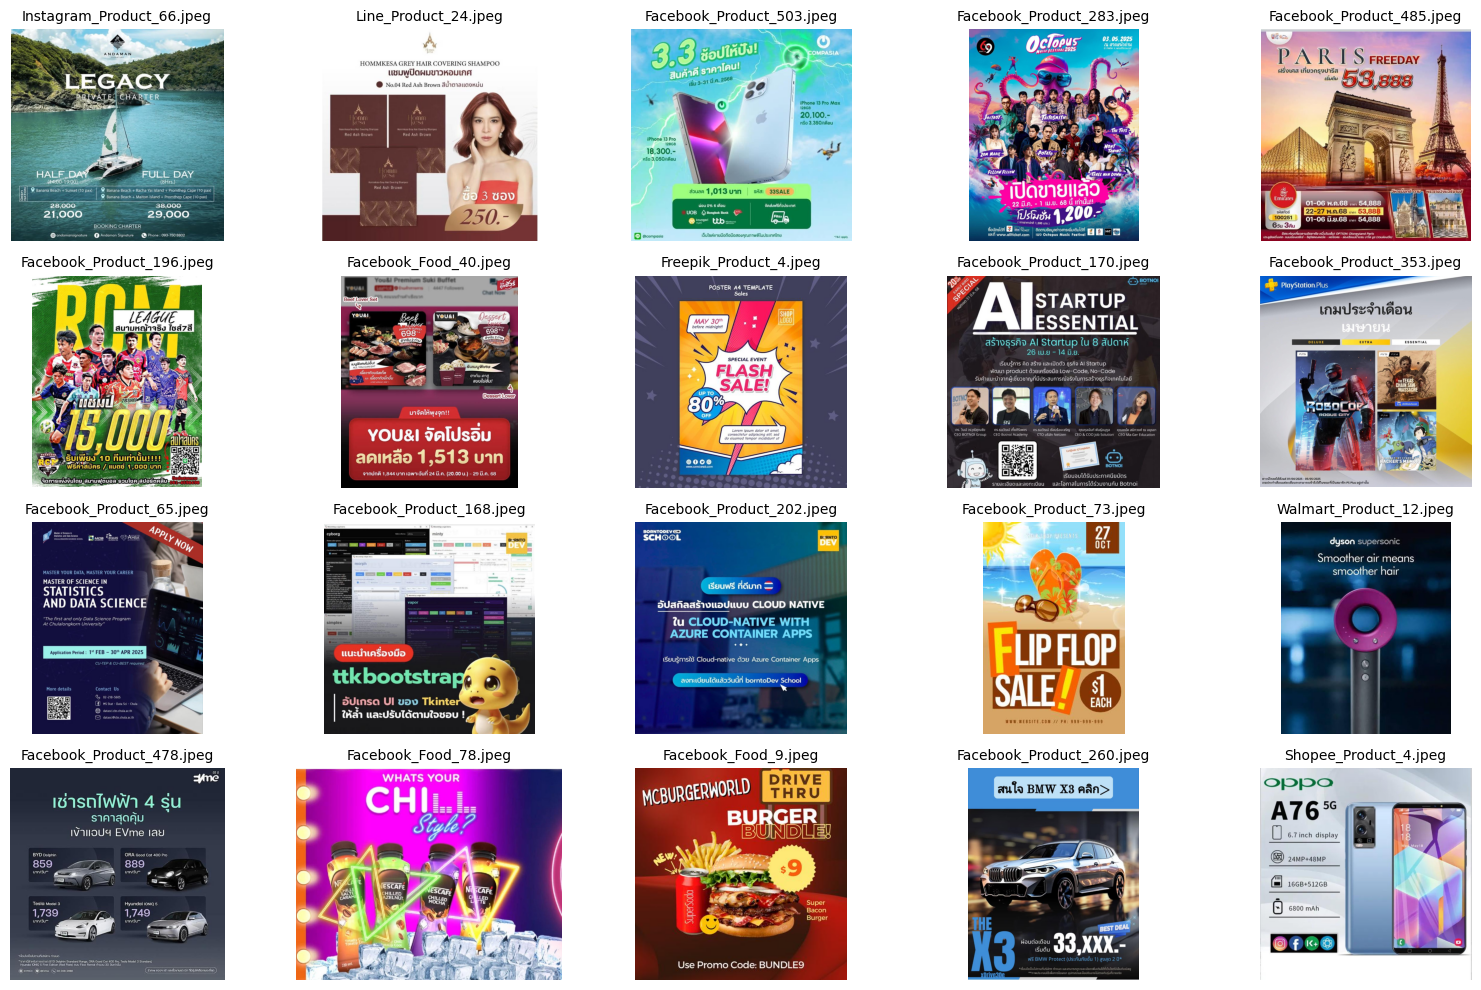

In [9]:
all_files = [f for f in os.listdir(base_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

sampled_files = random.sample(all_files, 20)

fig, axes = plt.subplots(4, 5, figsize=(16, 10))

for ax, file_name in zip(axes.flatten(), sampled_files):
    img_path = os.path.join(base_folder, file_name)
    img = Image.open(img_path)

    ax.imshow(img)
    ax.set_title(file_name, fontsize=10)  #
    ax.axis("off")  

plt.tight_layout()
plt.show()

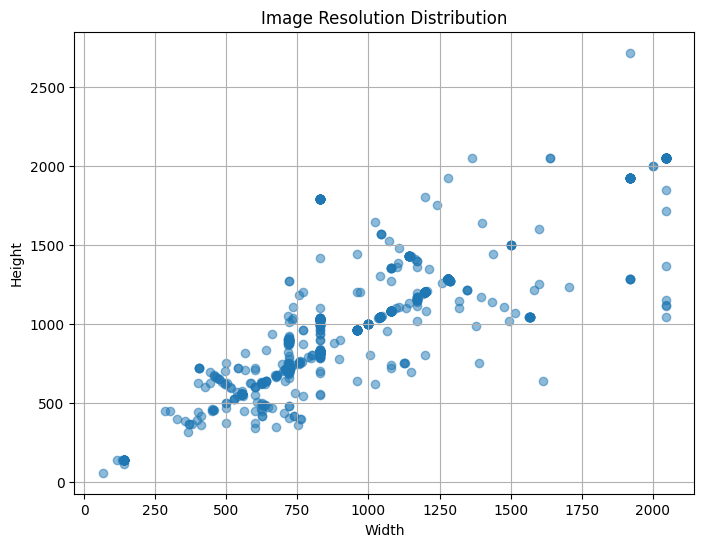

In [ ]:
image_sizes = []

for file in os.listdir(base_folder):
    if file.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(base_folder, file)
        with Image.open(img_path) as img:
            image_sizes.append(img.size)  # (width, height)

widths, heights = zip(*image_sizes)

plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Resolution Distribution")
plt.grid(True)
plt.show()

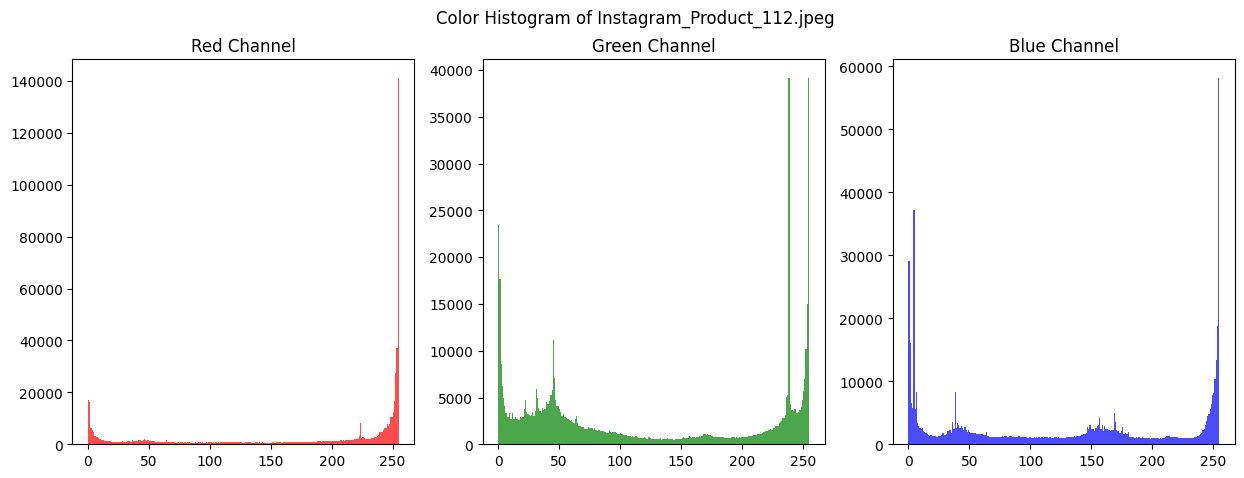

In [ ]:
from collections import Counter

# เลือกสุ่มรูปมาทำ histogram
sample_img = random.choice(all_files)
img_path = os.path.join(base_folder, sample_img)

# อ่านรูปและแปลงเป็น array
img = Image.open(img_path)
img_array = np.array(img)

# แยก RGB channel
r, g, b = img_array[:,:,0], img_array[:,:,1], img_array[:,:,2]

# สร้าง histogram
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].hist(r.ravel(), bins=256, color="red", alpha=0.7)
axes[0].set_title("Red Channel")
axes[1].hist(g.ravel(), bins=256, color="green", alpha=0.7)
axes[1].set_title("Green Channel")
axes[2].hist(b.ravel(), bins=256, color="blue", alpha=0.7)
axes[2].set_title("Blue Channel")

plt.suptitle(f"Color Histogram of {sample_img}")
plt.show()

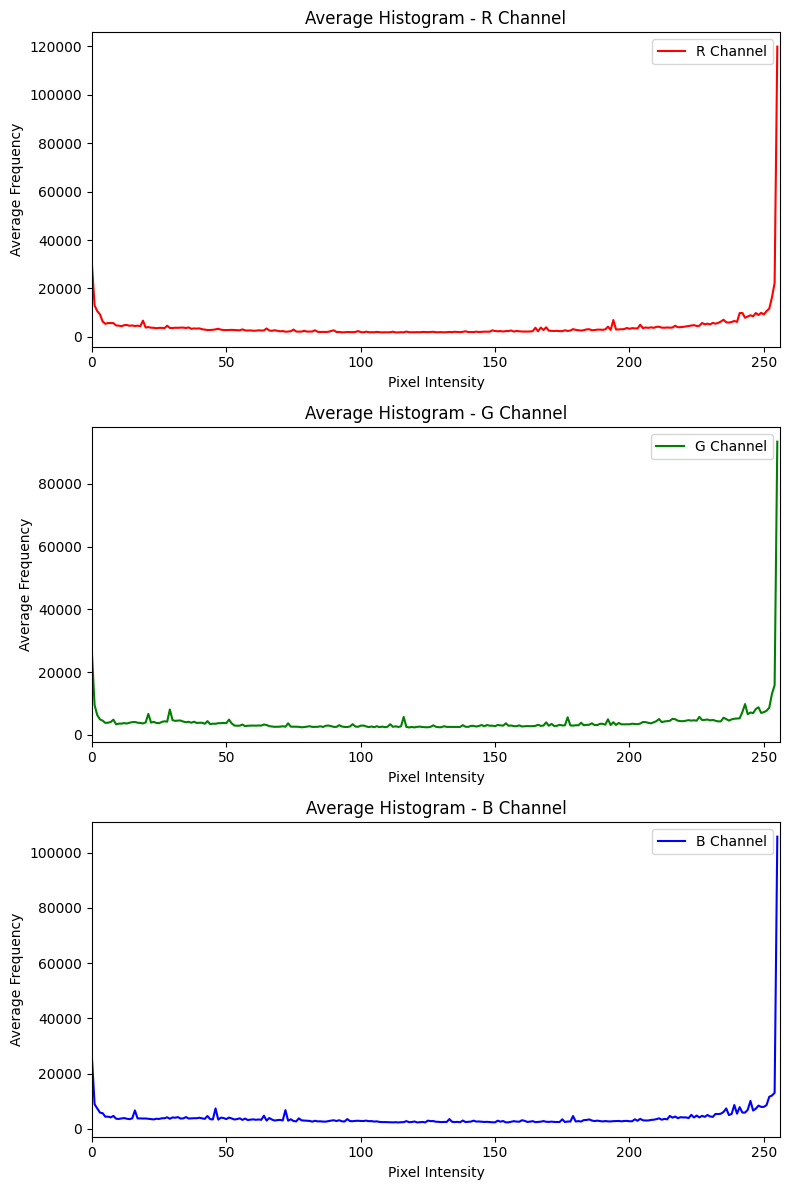

In [16]:
image_files = [f for f in os.listdir(base_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# 🎨 สีที่ใช้แสดงผล (RGB)
colors = ('r', 'g', 'b')

# สร้างตัวแปรเก็บ histogram รวมของแต่ละช่องสี
hist_sum = {color: np.zeros((256, 1), dtype=np.float32) for color in colors}

# 📊 วนลูปคำนวณ Histogram ของทุกภาพ
num_images = len(image_files)

for image_file in image_files:
    img_path = os.path.join(base_folder, image_file)
    img = cv2.imread(img_path)  # โหลดรูปภาพ
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # แปลงเป็น RGB

    # คำนวณ histogram ของแต่ละช่องสี
    for i, color in enumerate(colors):
        hist = cv2.calcHist([img], [i], None, [256], [0, 256])
        hist_sum[color] += hist  # รวมค่า histogram

# คำนวณค่าเฉลี่ยของ histogram
hist_avg = {color: hist_sum[color] / num_images for color in colors}

# 🎨 Plot แยกแต่ละสี
fig, axes = plt.subplots(3, 1, figsize=(8, 12))  # 3 แถว 1 คอลัมน์

for i, color in enumerate(colors):
    axes[i].plot(hist_avg[color], color=color, label=f"{color.upper()} Channel")
    axes[i].set_xlim([0, 256])
    axes[i].set_xlabel("Pixel Intensity")
    axes[i].set_ylabel("Average Frequency")
    axes[i].set_title(f"Average Histogram - {color.upper()} Channel")
    axes[i].legend()

plt.tight_layout()
plt.show()
